In [17]:
%reset -f

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd

from collections import Counter

import psutil

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [19]:
numJobs = psutil.cpu_count(logical=False)
numJobs

4

In [21]:
df = pd.read_csv('GRE_Admissions.csv')
df.head(10)

,Verbal,Quantitative,Analytical_Writing,CGPA,Age,Admitted
0,490,760,3.5,4.53,31,0
1,710,800,4.0,4.85,31,1
2,680,680,4.0,4.64,22,0
3,590,690,2.0,3.31,23,0
4,570,780,3.0,4.38,24,0
5,660,690,4.0,3.32,22,0
6,480,770,2.5,4.61,24,0
7,700,800,3.0,3.49,22,1
8,650,700,6.0,3.63,24,0
9,520,740,5.0,3.36,22,0


## NOTE: We'll skip most of the data exploration

In [22]:
res = Counter(df['Admitted'])

print('Admission Outcomes:')

for ky in res.keys():
    ss = round(100*res[ky]/df.shape[0], 2)
    if ky==1:
        tt = '\tAdmitted'
    else:
        tt = '\tNot Admitted'
    print(tt+':', ss, '%')

Admission Outcomes:
	Not Admitted: 76.05 %
	Admitted: 23.95 %


In [24]:
data = df.drop(['Admitted'], axis=1)
target = df['Admitted']

In [25]:
x, xt, y, yt = train_test_split(data, target)

In [29]:
# res = Counter(y)

# print('Admission Outcomes:')

# for ky in res.keys():
#     ss = round(100*res[ky]/y.shape[0], 2)
#     if ky==1:
#         tt = '\tAdmitted'
#     else:
#         tt = '\tNot Admitted'
#     print(tt+':', ss, '%')

In [30]:
# res = Counter(yt)

# print('Admission Outcomes:')

# for ky in res.keys():
#     ss = round(100*res[ky]/yt.shape[0], 2)
#     if ky==1:
#         tt = '\tAdmitted'
#     else:
#         tt = '\tNot Admitted'
#     print(tt+':', ss, '%')

In [31]:
theCols = [i for i in x.columns]

In [33]:
stdScaler = StandardScaler()

stdScaler.fit(x)

x = stdScaler.transform(x)
xt = stdScaler.transform(xt)

## Logistic Regression

In [34]:
baseModel = LogisticRegression()

baseModel.fit(x,y);

In [35]:
yp = baseModel.predict(x)
ytp = baseModel.predict(xt)

In [38]:
trainAcc = round(100*accuracy_score(y_true=y, y_pred=yp), 2)
print('\n\nTrain Accuracy:', trainAcc, '%\n')

print('Train Confusion Matrix:')
confusion_matrix(y_true=y, y_pred=yp)



Train Accuracy: 91.88 %

Train Confusion Matrix:


array([[5422,  271],
       [ 338, 1469]], dtype=int64)

In [40]:
testAcc = round(100*accuracy_score(y_true=yt, y_pred=ytp), 2)
print('\n\nTest Accuracy:', testAcc, '%\n')

print('Test Confusion Matrix:')
confusion_matrix(y_true=yt, y_pred=ytp)



Test Accuracy: 91.72 %

Test Confusion Matrix:


array([[1822,   90],
       [ 117,  471]], dtype=int64)

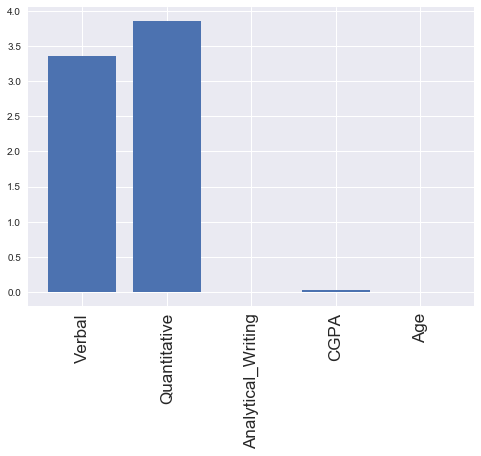

In [43]:
tt = baseModel.coef_[0]

p = list(zip(theCols, tt))

px = [i[0] for i in p]
py = [i[1] for i in p]

plt.bar(px,py)
plt.xticks(rotation=90, fontsize=17)
plt.show()

## Random Forest

In [44]:
baseModel = RandomForestClassifier()

baseModel.fit(x,y);

In [45]:
yp = baseModel.predict(x)

trainAcc = round(100*accuracy_score(y_true=y, y_pred=yp), 2)
print('\n\nTrain Accuracy:', trainAcc, '%\n')

print('Train Confusion Matrix:')
confusion_matrix(y_true=y, y_pred=yp)



Train Accuracy: 100.0 %

Train Confusion Matrix:


array([[5693,    0],
       [   0, 1807]], dtype=int64)

In [46]:
ytp = baseModel.predict(xt)

testAcc = round(100*accuracy_score(y_true=yt, y_pred=ytp), 2)
print('\n\nTest Accuracy:', testAcc, '%\n')

print('Test Confusion Matrix:')
confusion_matrix(y_true=yt, y_pred=ytp)



Test Accuracy: 100.0 %

Test Confusion Matrix:


array([[1912,    0],
       [   0,  588]], dtype=int64)

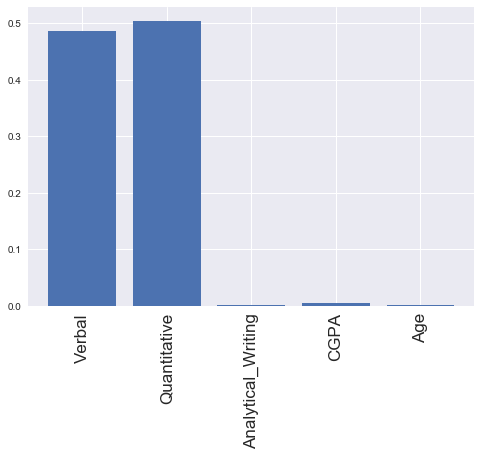

In [47]:
tt = baseModel.feature_importances_

p = list(zip(theCols, tt))

px = [i[0] for i in p]
py = [i[1] for i in p]

plt.bar(px,py)
plt.xticks(rotation=90, fontsize=17)
plt.show()

#### NOTES: One-Hot-Encoding and Label-Binarizer

In [62]:
pdf = df.copy()
pSaved = pdf['Admitted']

pdf = pdf.drop(['Admitted'], axis=1)

In [63]:
tt = ['Tall', 'Short', 'Average']

ts = [np.random.choice(tt) for i in range(pdf.shape[0])]

pdf['Height'] = ts
pdf['Admitted'] = ['Admitted' if i==1 else 'Not_Admitted' for i in ts]

pdf.head(15)

,Verbal,Quantitative,Analytical_Writing,CGPA,Age,Height,Admitted
0,490,760,3.5,4.53,31,Tall,Not_Admitted
1,710,800,4.0,4.85,31,Short,Not_Admitted
2,680,680,4.0,4.64,22,Tall,Not_Admitted
3,590,690,2.0,3.31,23,Tall,Not_Admitted
4,570,780,3.0,4.38,24,Tall,Not_Admitted
5,660,690,4.0,3.32,22,Short,Not_Admitted
6,480,770,2.5,4.61,24,Tall,Not_Admitted
7,700,800,3.0,3.49,22,Average,Not_Admitted
8,650,700,6.0,3.63,24,Average,Not_Admitted
9,520,740,5.0,3.36,22,Average,Not_Admitted


In [67]:
data = pdf.drop(['Admitted'], axis=1)
target = [1 if i=='Admitted' else 0 for i in pdf['Admitted']]

data = pd.get_dummies(data) # this is where the encoding happens
data['Target'] = target
data.head(15)

,Verbal,Quantitative,Analytical_Writing,CGPA,Age,Height_Average,Height_Short,Height_Tall,Target
0,490,760,3.5,4.53,31,0,0,1,0
1,710,800,4.0,4.85,31,0,1,0,0
2,680,680,4.0,4.64,22,0,0,1,0
3,590,690,2.0,3.31,23,0,0,1,0
4,570,780,3.0,4.38,24,0,0,1,0
5,660,690,4.0,3.32,22,0,1,0,0
6,480,770,2.5,4.61,24,0,0,1,0
7,700,800,3.0,3.49,22,1,0,0,0
8,650,700,6.0,3.63,24,1,0,0,0
9,520,740,5.0,3.36,22,1,0,0,0


In [ ]:
target